# Spaceship Titanic dataset (Kaggle)


Variables description (from Kaggle):

- `PassengerId`: unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and `pp` is their number within the group. People in a group are often family members, but not always.
 
- `HomePlanet`: The planet the passenger departed from, typically their planet of permanent residence.
 
- `CryoSleep`: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  
- `Destination` - The planet the passenger will be debarking to.

- `Age` - The age of the passenger.
  
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.

- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- `Name` - The first and last names of the passenger.

- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Load libraries

In [1]:
from pathlib import Path
import sys
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import SGDClassifier, LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

np.random.seed(123)

# Python version
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
# Load the dataset
def load_ds(path: Path, filename: str) -> pd.DataFrame:
    """Read the dataset csv file as a pandas dataframe."""
    return pd.read_csv(path / filename)

# Load dataset
dataset_path = Path().absolute() / "data"
filename = "train.csv"
data = load_ds(dataset_path, filename)

# Convert data type & add column

In [3]:
def convert_df(df_in: pd.DataFrame,
               col_cat: list[str],
               col_str: list[str],
               col_bool: list[str]
 ) -> pd.DataFrame:
    """Converts the specified columns to categorical, string or bool types."""

    df_out = df_in.copy()

    for column in col_cat:
        df_out[column] = df_out[column].astype("category")
    
    for column in col_str:
        df_out[column] = df_out[column].astype("string")

    for column in col_bool:
        df_out[column] = df_out[column].astype("bool")

    return df_out

In [4]:
c_cat = ["HomePlanet", "Cabin", "Destination"]
c_str = ["PassengerId", "Name"]
c_bool = ["CryoSleep", "VIP"]

train = convert_df(
        df_in=data,
        col_cat=c_cat,
        col_str=c_str,
        col_bool=c_bool,
    )

In [5]:
data[["group", "group_n"]] = data.PassengerId.str.split("_", expand=True)
data.loc[:9, ["PassengerId", "group", "group_n"]]

,PassengerId,group,group_n
0,0001_01,0001,01
1,0002_01,0002,01
2,0003_01,0003,01
3,0003_02,0003,02
4,0004_01,0004,01
5,0005_01,0005,01
6,0006_01,0006,01
7,0006_02,0006,02
8,0007_01,0007,01
9,0008_01,0008,01


In [6]:
data[["deck", "num", "side"]] = data.Cabin.str.split("/", expand=True)
print(data.loc[:9, ["Cabin", "deck", "num", "side"]])

data["deck"] = data["deck"].astype("category")
data["num"] = data["num"].astype("string")
data["side"] = data["side"].astype("category")

   Cabin deck num side
0  B/0/P    B   0    P
1  F/0/S    F   0    S
2  A/0/S    A   0    S
3  A/0/S    A   0    S
4  F/1/S    F   1    S
5  F/0/P    F   0    P
6  F/2/S    F   2    S
7  G/0/S    G   0    S
8  F/3/S    F   3    S
9  B/1/P    B   1    P


In [7]:
print(data.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'group', 'group_n', 'deck', 'num', 'side'],
      dtype='object')


# Split train and test sets

In [8]:
X_y_train, X_y_test  = train_test_split(data, test_size=0.2, random_state=123, shuffle=True)

print(f"shape data: {data.shape}")

print(f"\n{data.shape[0]} * 0.8 = {data.shape[0] * 0.8}")
print(f"shape X_y_train: {X_y_train.shape}")

print(f"\n{data.shape[0]} * 0.2 = {data.shape[0] * 0.2}")
print(f"shape X_y_test:  {X_y_test.shape}")

shape data: (8693, 19)

8693 * 0.8 = 6954.400000000001
shape X_y_train: (6954, 19)

8693 * 0.2 = 1738.6000000000001
shape X_y_test:  (1739, 19)


# Summary

In [9]:
print(X_y_train.head())

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
7074     7527_01      Earth     False  F/1561/P  TRAPPIST-1e  18.0  False   
6710     7083_01     Europa      True   C/259/S  TRAPPIST-1e  32.0  False   
2569     2755_01     Europa      True    B/85/P  55 Cancri e  36.0  False   
3850     4127_01     Europa       NaN   B/130/P  TRAPPIST-1e  23.0  False   
7450     7972_02     Europa     False   B/260/P  TRAPPIST-1e  35.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck               Name  \
7074          0.0      732.0           2.0  13.0    47.0    Elle Flowensley   
6710          0.0        0.0           0.0   0.0     0.0    Betenar Pirejus   
2569          0.0        0.0           0.0   0.0     0.0  Beneba Glousspidy   
3850          0.0        0.0           0.0   0.0     NaN     Dsch Ainserfle   
7450          NaN      246.0          25.0  42.0  3730.0   Atinon Cattyried   

      Transported group group_n deck   num side  
7074        

In [10]:
print(X_y_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 7074 to 3582
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   6954 non-null   object  
 1   HomePlanet    6789 non-null   object  
 2   CryoSleep     6782 non-null   object  
 3   Cabin         6795 non-null   object  
 4   Destination   6805 non-null   object  
 5   Age           6809 non-null   float64 
 6   VIP           6800 non-null   object  
 7   RoomService   6801 non-null   float64 
 8   FoodCourt     6796 non-null   float64 
 9   ShoppingMall  6788 non-null   float64 
 10  Spa           6808 non-null   float64 
 11  VRDeck        6809 non-null   float64 
 12  Name          6786 non-null   object  
 13  Transported   6954 non-null   bool    
 14  group         6954 non-null   object  
 15  group_n       6954 non-null   object  
 16  deck          6795 non-null   category
 17  num           6795 non-null   string  
 18  side 

# Numerical variable

In [11]:
print(X_y_train.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  6809.000000   6801.000000   6796.000000   6788.000000   6808.000000   
mean     28.767367    228.167328    457.455121    177.070566    312.454759   
std      14.479764    678.074186   1574.283112    621.328736   1155.364951   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     49.000000     82.250000     29.000000     62.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   6809.000000  
mean     314.841093  
std     1197.617845  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       45.000000  
max    24133.000000  


In [12]:
X_num = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
X_num_y = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Transported"]


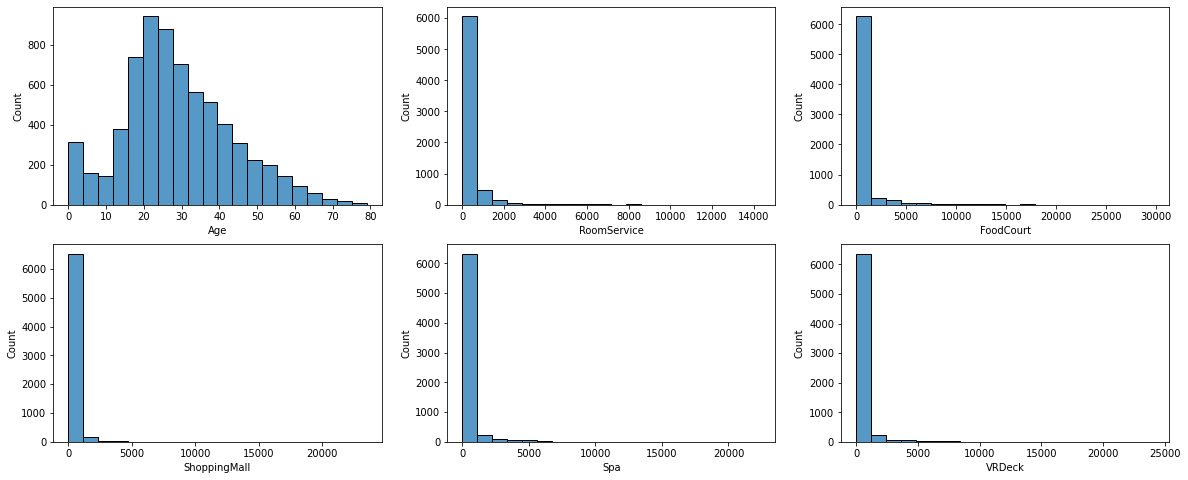

In [13]:
hs = X_y_train[X_num]

f, axes = plt.subplots(2, 3, figsize=(20, 8))
for ax, feature in zip(axes.flat, hs.columns):
    sns.histplot(hs[feature], bins=20, ax=ax)
plt.show()

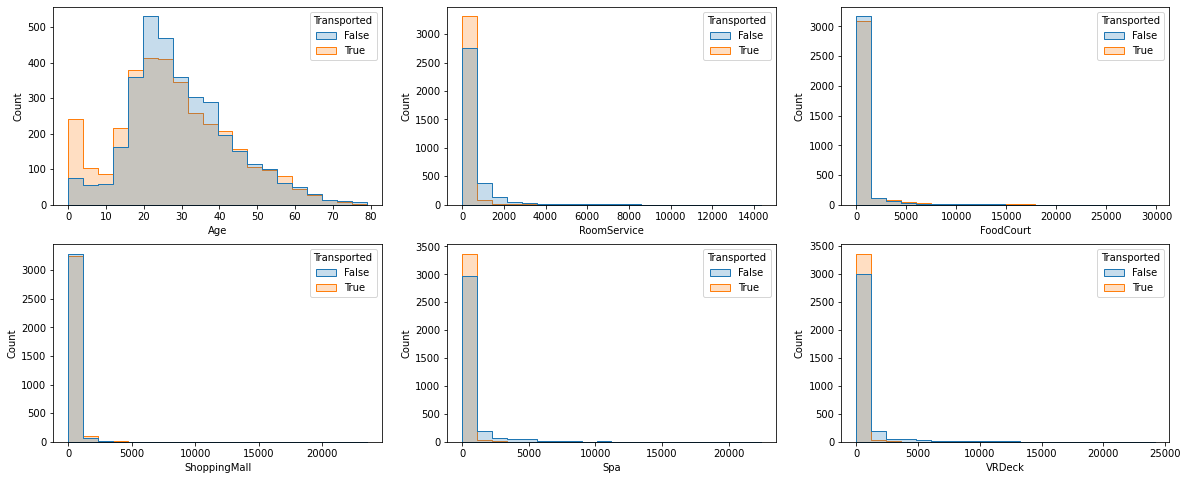

In [14]:
f, axes = plt.subplots(2, 3, figsize=(20, 8))
for ax, feature in zip(axes.flat, X_num):
    sns.histplot(data=X_y_train, x=feature, bins=20, ax=ax, hue="Transported", element="step")
plt.show()

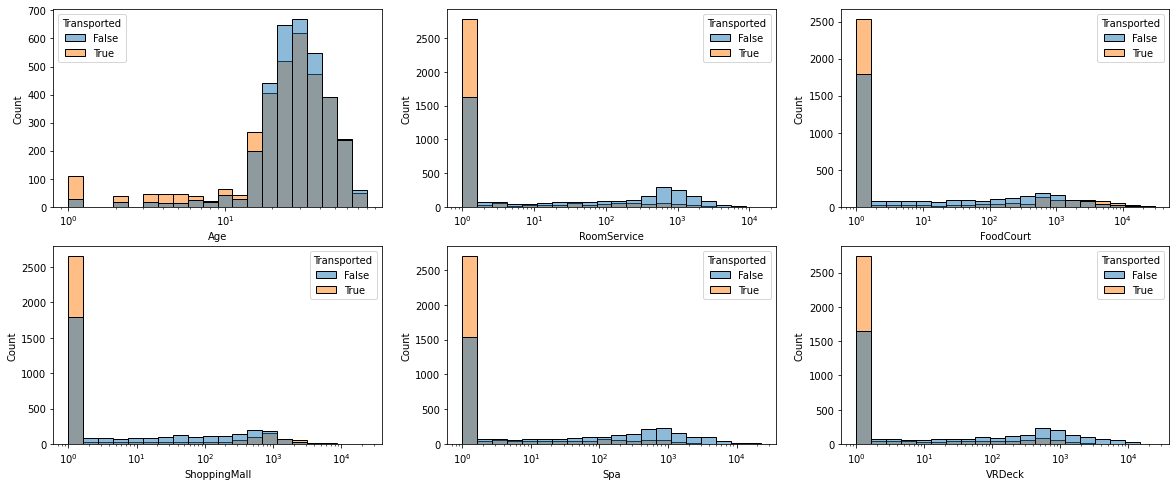

In [15]:
f, axes = plt.subplots(2, 3, figsize=(20, 8))
for ax, feature in zip(axes.flat, X_num):
    x = X_y_train[feature] + 1
    sns.histplot(x=x, bins=20, ax=ax, hue=X_y_train["Transported"], log_scale=True)
plt.show()

In [16]:
# Test set
X_y_test["amenities_sum"] = X_y_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
X_y_test["amenities_mean"] = X_y_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].mean(axis=1)
X_y_test["amenities_min"] = X_y_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].min(axis=1)
X_y_test["amenities_max"] = X_y_test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].max(axis=1)

# Train set
X_y_train["amenities_sum"] = X_y_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
X_y_train["amenities_mean"] = X_y_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].mean(axis=1)
X_y_train["amenities_min"] = X_y_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].min(axis=1)
X_y_train["amenities_max"] = X_y_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].max(axis=1)

print(X_y_train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "amenities_sum"]])

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  amenities_sum
7074          0.0      732.0           2.0   13.0    47.0          794.0
6710          0.0        0.0           0.0    0.0     0.0            0.0
2569          0.0        0.0           0.0    0.0     0.0            0.0
3850          0.0        0.0           0.0    0.0     NaN            0.0
7450          NaN      246.0          25.0   42.0  3730.0         4043.0
...           ...        ...           ...    ...     ...            ...
7382         34.0        1.0           0.0  824.0    29.0          888.0
7763       1242.0        0.0         654.0    0.0     0.0         1896.0
5218       2445.0     3023.0           0.0  704.0    20.0         6192.0
1346          0.0        0.0           0.0    0.0     0.0            0.0
3582          0.0        0.0           0.0    0.0     0.0            0.0

[6954 rows x 6 columns]


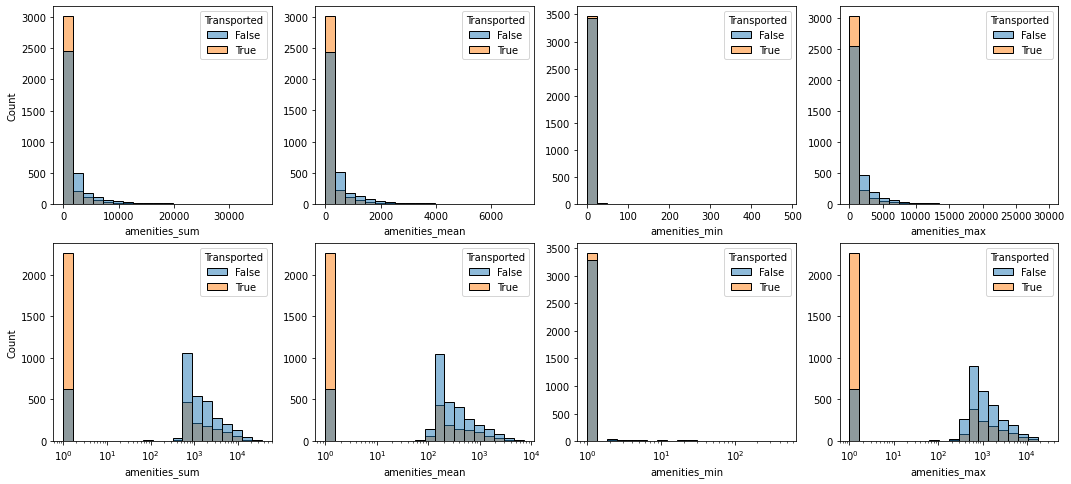

In [17]:
plt.figure(figsize=(18, 8))
i = 1
for feature in ["amenities_sum", "amenities_mean", "amenities_min", "amenities_max"]:
    plt.subplot(2, 4, i)
    sns.histplot(data=X_y_train, x=feature, bins=20, hue="Transported")
    if i>1:
        plt.ylabel("")

    plt.subplot(2, 4, i+4)
    x = X_y_train[feature] + 1
    sns.histplot(x=x, hue=X_y_train["Transported"], bins=20, log_scale=True)
    if (i+4)>5:
        plt.ylabel("")

    i += 1
plt.show()

<Figure size 720x576 with 0 Axes>

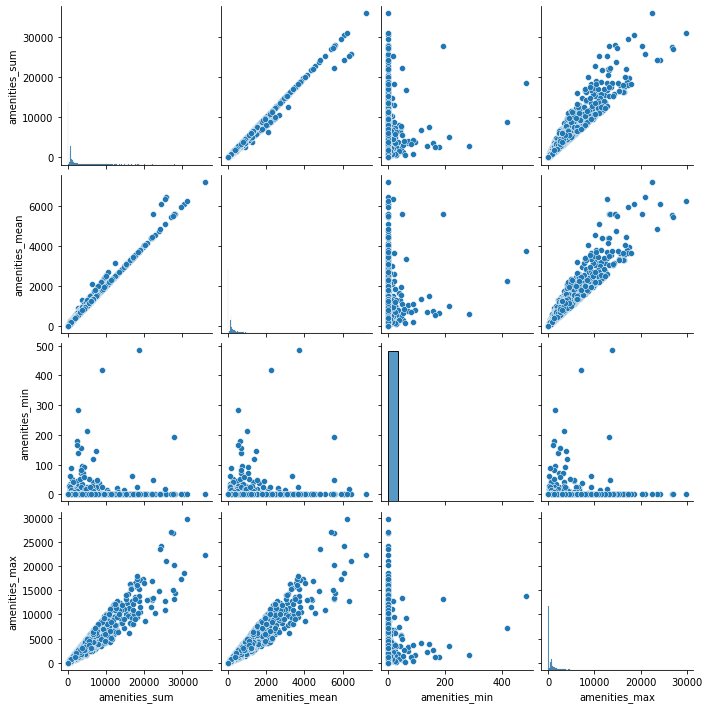

In [18]:
plt.figure(figsize=(10, 8))
sns.pairplot(X_y_train.loc[:, ["amenities_sum", "amenities_mean", "amenities_min", "amenities_max"]])
plt.show()

<Figure size 720x576 with 0 Axes>

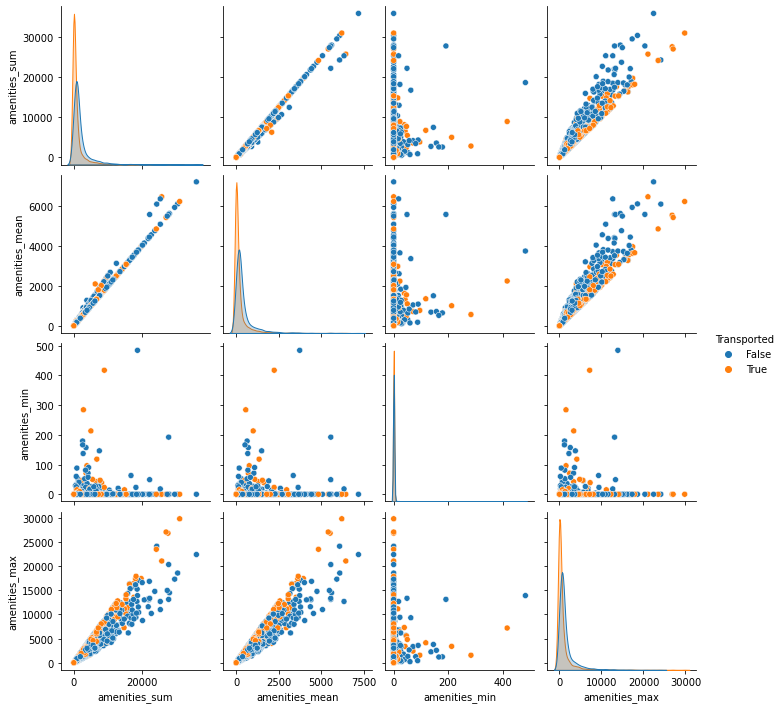

In [19]:
plt.figure(figsize=(10, 8))
sns.pairplot(X_y_train.loc[:, ["amenities_sum", "amenities_mean", "amenities_min", "amenities_max", "Transported"]], hue="Transported")
plt.show()

Amenities:
- `amenities_min` doesn't seem to be useful and is not related to the other anenities indices.
- `amenities_sum` and `amenities_mean` are strongly correlated.
- `amenities_max` is also correlated with `amenities_sum` and `amenities_mean`.

`amenities_max`, `amenities_sum` and `amenities_mean` are probably equivalent, so I'll use `amenities_mean`.

In [20]:
X_y_train.amenities_sum.describe()

count     6954.000000
mean      1457.223325
std       2829.682478
min          0.000000
25%          0.000000
50%        721.500000
75%       1449.750000
max      35987.000000
Name: amenities_sum, dtype: float64

In [21]:
bins = [-np.inf, 0, 1450, np.inf]
names = ["low", "medium", "high"]

X_y_test.loc[:, "amenities_sum_bin"] = pd.cut(X_y_test.amenities_sum, bins=bins, labels=names)

X_y_train.loc[:, "amenities_sum_bin"] = pd.cut(X_y_train.amenities_sum, bins=bins, labels=names)

X_y_train.amenities_sum_bin.value_counts()

low       2888
medium    2328
high      1738
Name: amenities_sum_bin, dtype: int64

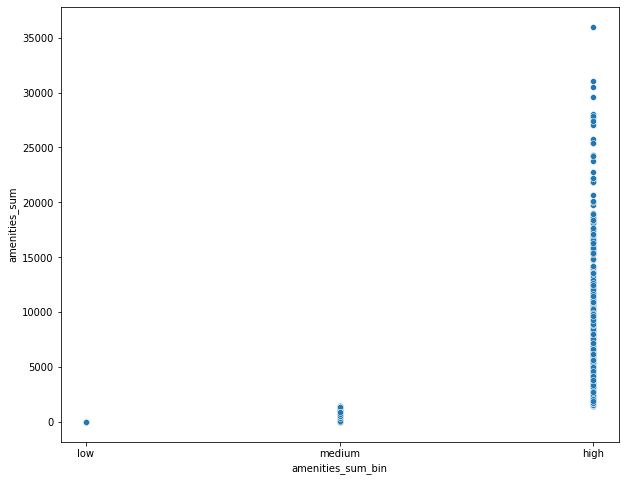

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_y_train.amenities_sum_bin, y=X_y_train.amenities_sum)
plt.show()

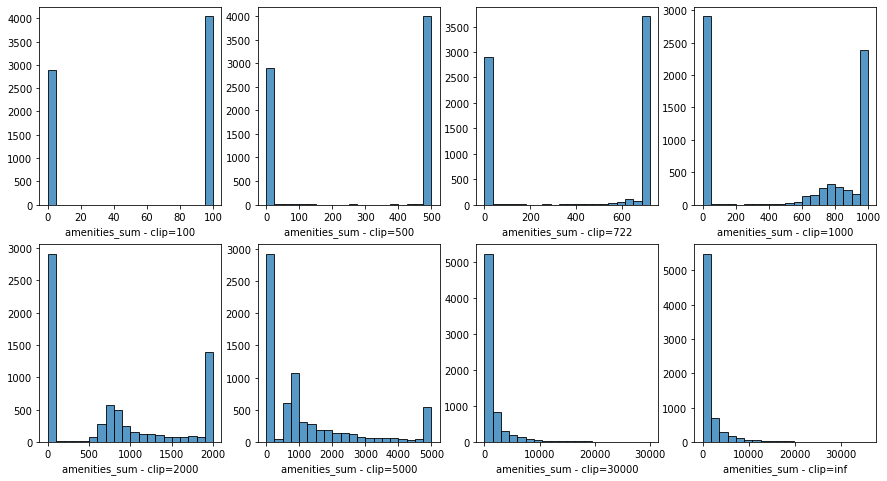

In [23]:
clip_treashold = [100, 500, 722, 1000, 2000, 5000, 30000, np.inf, ] # max = 35987

plt.figure(figsize=(15 ,8))
for i, ct in enumerate(clip_treashold):
    plt.subplot(2, 4, i+1)
    plot_x = X_y_train.amenities_sum.clip(upper=ct)
    sns.histplot(plot_x, bins=20)
    plt.ylabel("")
    plt.xlabel(f"amenities_sum - clip={ct}")
plt.show()

A lot of passengers have `amenities_sum=0` and clipping doesn't seem to improve the distribution.

# Categorical variables

In [24]:
columns = ["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported", "group_n"]
for c in columns:
    print(f"\n{c} - value counts" + "-" *50)
    print(X_y_train[c].value_counts(dropna=False))


HomePlanet - value counts--------------------------------------------------
Earth     3679
Europa    1706
Mars      1404
NaN        165
Name: HomePlanet, dtype: int64

CryoSleep - value counts--------------------------------------------------
False    4377
True     2405
NaN       172
Name: CryoSleep, dtype: int64

Destination - value counts--------------------------------------------------
TRAPPIST-1e      4715
55 Cancri e      1438
PSO J318.5-22     652
NaN               149
Name: Destination, dtype: int64

VIP - value counts--------------------------------------------------
False    6630
True      170
NaN       154
Name: VIP, dtype: int64

Transported - value counts--------------------------------------------------
True     3490
False    3464
Name: Transported, dtype: int64

group_n - value counts--------------------------------------------------
01    4996
02    1119
03     454
04     186
05      95
06      56
07      37
08      11
Name: group_n, dtype: int64


In [25]:
print(X_y_train["group"].value_counts(dropna=False))

5885    8
9081    8
4498    8
5756    7
3850    7
       ..
7494    1
6421    1
6304    1
8710    1
3852    1
Name: group, Length: 5240, dtype: int64


In [26]:
columns = ["deck", "num", "side"]
for c in columns:
    print(f"\n{c} - value counts" + "-" *50)
    print(X_y_train[c].value_counts(dropna=False))


deck - value counts--------------------------------------------------
F      2229
G      2031
E       713
B       636
C       595
D       384
A       203
NaN     159
T         4
Name: deck, dtype: int64

num - value counts--------------------------------------------------
<NA>    159
82       24
109      19
86       17
150      17
       ... 
1091      1
1839      1
785       1
1651      1
741       1
Name: num, Length: 1732, dtype: Int64

side - value counts--------------------------------------------------
S      3428
P      3367
NaN     159
Name: side, dtype: int64


In [27]:
gn_plot = (
    X_y_train
    .loc[:, ["group_n", "Transported"]]
    .value_counts(dropna=False)
    .rename("count")
    .reset_index()
)

gn_plot

,group_n,Transported,count
0,01,False,2629
1,01,True,2367
2,02,True,624
3,02,False,495
4,03,True,282
5,03,False,172
6,04,True,106
7,04,False,80
8,05,True,55
9,05,False,40


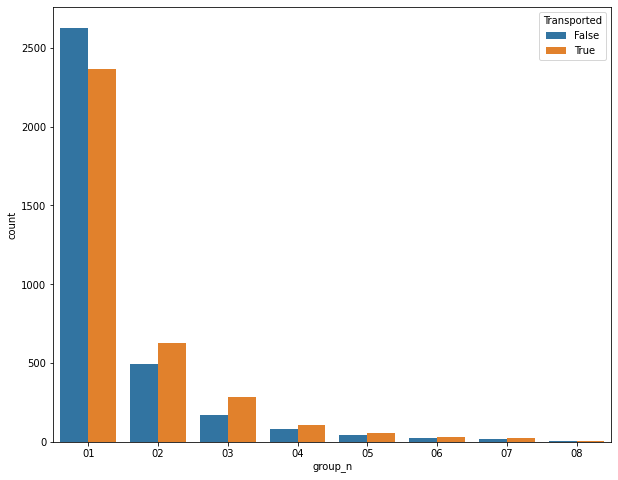

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(data=gn_plot, x="group_n", y="count", hue="Transported")
plt.show()

In [29]:
# Test set
X_y_test.loc[:, "group_size"] = np.nan

X_y_test.loc[X_y_test.group_n.isin(["01"]), "group_size"] = "g1"
X_y_test.loc[X_y_test.group_n.isin(["02"]), "group_size"] = "g2"
X_y_test.loc[X_y_test.group_n.isin(["03"]), "group_size"] = "g3"
X_y_test.loc[X_y_test.group_n.isin(["04", "05", "06", "07", "08"]), "group_size"] = "gN"

# Train set
X_y_train.loc[:, "group_size"] = np.nan

X_y_train.loc[X_y_train.group_n.isin(["01"]), "group_size"] = "g1"
X_y_train.loc[X_y_train.group_n.isin(["02"]), "group_size"] = "g2"
X_y_train.loc[X_y_train.group_n.isin(["03"]), "group_size"] = "g3"
X_y_train.loc[X_y_train.group_n.isin(["04", "05", "06", "07", "08"]), "group_size"] = "gN"

In [30]:
ct1 = (
    X_y_train
    .loc[:, ["group_n", "group_size"]]
    .value_counts(dropna=False)
    .rename("count")
    .reset_index()
)

ct1

,group_n,group_size,count
0,01,g1,4996
1,02,g2,1119
2,03,g3,454
3,04,gN,186
4,05,gN,95
5,06,gN,56
6,07,gN,37
7,08,gN,11


In [31]:
ct1.pivot(index="group_n", columns="group_size", values="count")

group_size,g1,g2,g3,gN
group_n,,,,
01,4996.0,NaN,NaN,NaN
02,NaN,1119.0,NaN,NaN
03,NaN,NaN,454.0,NaN
04,NaN,NaN,NaN,186.0
05,NaN,NaN,NaN,95.0
06,NaN,NaN,NaN,56.0
07,NaN,NaN,NaN,37.0
08,NaN,NaN,NaN,11.0


# Export data

In [32]:
# Same columns?
print(f"Test set:\n{X_y_test.columns}")
print(f"\nTrain set:\n{X_y_train.columns}")

Test set:
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'group', 'group_n', 'deck', 'num', 'side',
       'amenities_sum', 'amenities_mean', 'amenities_min', 'amenities_max',
       'amenities_sum_bin', 'group_size'],
      dtype='object')

Train set:
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'group', 'group_n', 'deck', 'num', 'side',
       'amenities_sum', 'amenities_mean', 'amenities_min', 'amenities_max',
       'amenities_sum_bin', 'group_size'],
      dtype='object')


In [33]:
X_y_test.to_csv(Path().absolute() / "data" / "X_y_test.csv")
X_y_test.to_csv(Path().absolute() / "data" / "X_y_train.csv")